### Model Building and Pickling

### 1. Import required libraries and read the dataset.

In [ ]:
#Install packages for a Jupyter notebook environment
# This script is intended to be run in a Jupyter notebook cell
%pip install ipykernel
%pip install pandas
%pip install seaborn
%pip install matplotlib 
%pip install scikit-learn

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

import sklearn
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('loan_approval_data.csv')
df.head()

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,lp001002,male,no,0.0,graduate,no,5849,0.0,NaN,360.0,1.0,urban,y
1,lp001003,male,yes,1.0,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,lp001005,male,yes,0.0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,lp001006,male,yes,0.0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,lp001008,male,no,0.0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y


### 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [3]:
## check the shape 
df.shape

(614, 13)

In [4]:
## check basic information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_id            614 non-null    object 
 1   gender             601 non-null    object 
 2   married            611 non-null    object 
 3   dependents         599 non-null    float64
 4   education          614 non-null    object 
 5   self_employed      582 non-null    object 
 6   applicantincome    614 non-null    int64  
 7   coapplicantincome  614 non-null    float64
 8   loanamount         592 non-null    float64
 9   loan_amount_term   600 non-null    float64
 10  credit_history     564 non-null    float64
 11  property_area      614 non-null    object 
 12  loan_status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


### 3. Check for missing values in the dataset, if present? handle them with appropriate methods and drop redundant features.

In [5]:
## checking percentage of the missing values.
df.isnull().sum()/len(df)*100

loan_id              0.000000
gender               2.117264
married              0.488599
dependents           2.442997
education            0.000000
self_employed        5.211726
applicantincome      0.000000
coapplicantincome    0.000000
loanamount           3.583062
loan_amount_term     2.280130
credit_history       8.143322
property_area        0.000000
loan_status          0.000000
dtype: float64

- We can observe that there are missing values in some columns, the percentage of the missing values are less than 10%, for now I am dropping the missing values from the dataset(we can also impute them).

In [6]:
## dropping missing values
df.dropna(inplace=True)

In [7]:
## recheck the missing values
df.isnull().sum()

loan_id              0
gender               0
married              0
dependents           0
education            0
self_employed        0
applicantincome      0
coapplicantincome    0
loanamount           0
loan_amount_term     0
credit_history       0
property_area        0
loan_status          0
dtype: int64

In [8]:
## dropping redundant columns
df.drop('loan_id',axis=1,inplace=True)

In [9]:
df.head(2)

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
1,male,yes,1.0,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,male,yes,0.0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y


### 4. Visualize the distribution of the target column 'loan_status' with respect to various categorical features and write your observations.

In [10]:
## storing the categorical column seperatly
cat_columns = df[['gender', 'married', 'education', 'self_employed', 'property_area']]

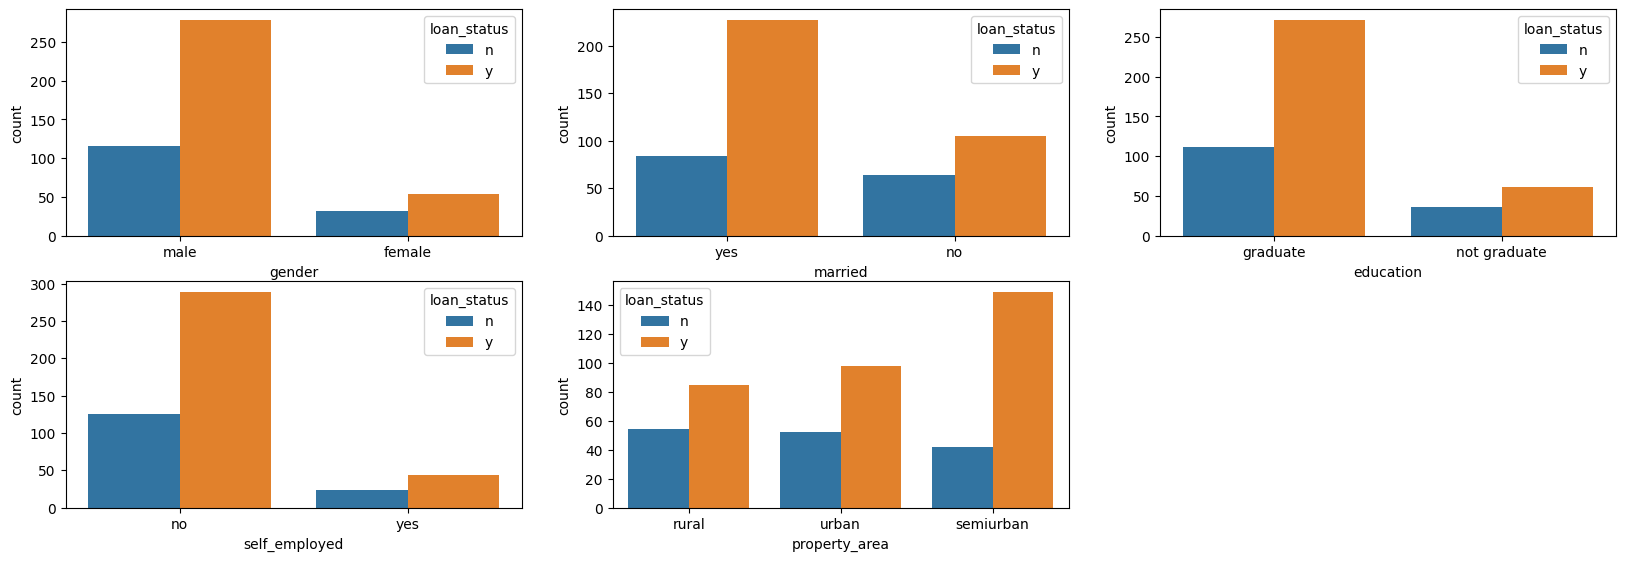

In [11]:
i = 1
plt.figure(figsize = (20,10))
for feature in cat_columns:
    plt.subplot(3,3,i)
    sns.countplot(x = feature,hue = 'loan_status' , data = df)
    i +=1

From the above plots we can observe that:
- There is higher probability for males for loan status being yes than that of females.
- Married and graduate people have the upperhand in getting the loan approved.
- Non self-employed have upperhand in getting the loan approved than that of self employed.
- The people live in semiurban area have the higher probability of getting the loan that of the urban and rural.

### 5. Encode the categorical data.

In [12]:
## first we will manual encode the target column.
## 'y': 1 and 'n':0
df['loan_status'] = df['loan_status'].replace({'y':1,'n':0})

In [13]:
df['loan_status'].unique()

array([0, 1])

In [14]:
## now lets encode other independent categorical variables.

In [15]:
## Encoding independent categoricals variables manually (can also be done through one_hot_encoder or label encoder)
df['gender'] = df['gender'].replace({'male':1, 'female':0})
df['married'] = df['married'].replace({'yes':1,'no':0})
df['self_employed'] = df['self_employed'].replace({'yes':1,'no':0})
df['property_area'] = df['property_area'].replace({'rural':0,'urban':1, 'semiurban':2})
df['education'] = df['education'].replace({'graduate':1, 'not graduate':0})

In [16]:
## lets check few rows after encoding
df.head(2)

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
1,1,1,1.0,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0.0,1,1,3000,0.0,66.0,360.0,1.0,1,1


### 6. Separate the target and independent features and split the data into train and test.

In [17]:
## separate target and independent variables
X = df.drop('loan_status',axis=1)
y = df['loan_status']

In [18]:
df['loan_status'].value_counts(normalize=True)*100

loan_status
1    69.166667
0    30.833333
Name: proportion, dtype: float64

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(336, 11) (144, 11)
(336,) (144,)


### 7. Build any classification model to predict the loan status of the customer and save your model using pickle.

In [20]:
## Let us build simple Adaptive Boosting classifier model
ab = AdaBoostClassifier()
ab.fit(X_train,y_train)

AdaBoostClassifier()

In [21]:
## Let us check the accuracy to see hows our model is performing

y_train_pred = ab.predict(X_train)
y_test_pred = ab.predict(X_test)

accuracy_train = accuracy_score(y_train,y_train_pred)
accuracy_test = accuracy_score(y_test,y_test_pred)

print('accuracy train:',accuracy_train)
print('accuarcy test',accuracy_test)

accuracy train: 0.8273809523809523
accuarcy test 0.7569444444444444


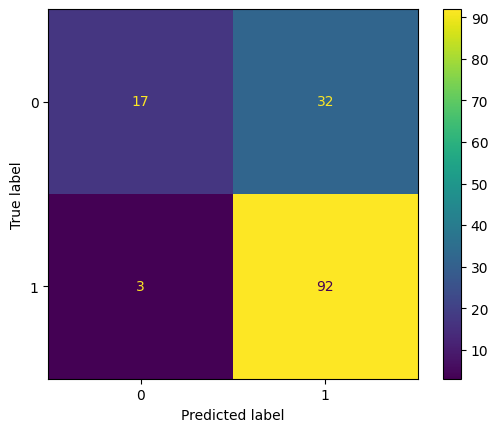

In [22]:
## Confusion matrix using test data
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(ab, X_test, y_test)
plt.show()

#### NOTE:
- As we can observe the model is overfitting. (due to imbalance in the target class)
- We can further improve the model by building tuning the hyperparameters.

### Pickling - Creating a pickle file with an extension as .pkl

In [ ]:
import pickle
# Saving model to disk
pickle.dump(ab, open('model.pkl','wb'))

#You will see a file named model.pkl in your current directory.
# Move this file to your desired location for deployment or further use i.e in main app folder, replace the existing model file.